In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import roc_auc_score, average_precision_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from itertools import combinations
from numpy import array,array_equal

pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

In [2]:
train = pd.read_csv('../Datasets/santander-customer-transaction-prediction/train.csv')
test = pd.read_csv('../Datasets/santander-customer-transaction-prediction/test.csv')

In [3]:
train.shape, test.shape

((200000, 202), (200000, 201))

Data exploration

In [4]:
train.describe()

,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,2000

In [5]:
test.describe()

,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000

In [8]:
train['ID_code']

0              train_0
1              train_1
2              train_2
3              train_3
4              train_4
              ...     
199995    train_199995
199996    train_199996
199997    train_199997
199998    train_199998
199999    train_199999
Name: ID_code, Length: 200000, dtype: object

In [9]:
train.isnull().sum(axis=0)

ID_code    0
target     0
var_0      0
var_1      0
var_2      0
          ..
var_195    0
var_196    0
var_197    0
var_198    0
var_199    0
Length: 202, dtype: int64

In [10]:
train.isnull().sum(axis=1)

0         0
1         0
2         0
3         0
4         0
         ..
199995    0
199996    0
199997    0
199998    0
199999    0
Length: 200000, dtype: int64

In [11]:
train['target'].value_counts()

0    179902
1     20098
Name: target, dtype: int64

In [13]:
feats_counts = train.nunique(dropna = False)

In [14]:
feats_counts.sort_values().head(25)

target         2
var_68       451
var_91      7962
var_108     8525
var_103     9376
var_12      9561
var_148    10608
var_161    11071
var_71     13527
var_25     14853
var_43     15188
var_125    16059
var_166    17902
var_169    18242
var_133    19236
var_15     19810
var_131    21464
var_23     24913
var_34     25164
var_93     26708
var_95     29387
var_42     31592
var_50     32308
var_126    32411
var_98     33266
dtype: int64

In [15]:
feats_counts.sort_values().tail(25)

var_54     144776
var_82     144829
var_184    145184
var_178    145235
var_30     145977
var_102    146237
var_96     148099
var_149    148504
var_182    149195
var_199    149430
var_100    150727
var_48     152039
var_70     153193
var_47     154781
var_160    156274
var_136    156615
var_187    157031
var_90     157210
var_120    158269
var_97     158739
var_61     159369
var_74     161058
var_117    164469
var_45     169968
ID_code    200000
dtype: int64

In [16]:
feats_counts_test = test.nunique(dropna = False)

In [17]:
feats_counts_test.sort_values().head(15)

var_68       428
var_91      7569
var_108     8188
var_103     8828
var_12      9121
var_148     9964
var_161    10506
var_71     12604
var_25     13728
var_43     14288
var_125    14744
var_166    16683
var_169    16759
var_133    17411
var_15     18253
dtype: int64

In [18]:
feats_counts_test.sort_values().tail(15)

var_100     86300
var_70      86863
var_48      86929
var_47      87427
var_160     88104
var_136     88160
var_187     88290
var_90      88329
var_120     88478
var_97      88491
var_61      88874
var_74      89343
var_117     90342
var_45      92058
ID_code    200000
dtype: int64

In [19]:
traintest = pd.concat([train, test], axis = 0)

In [20]:
traintest.duplicated().sum()

0

In [21]:
nunique = train.nunique(dropna=False)
nunique

ID_code    200000
target          2
var_0       94672
var_1      108932
var_2       86555
            ...  
var_195     57870
var_196    125560
var_197     40537
var_198     94153
var_199    149430
Length: 202, dtype: int64

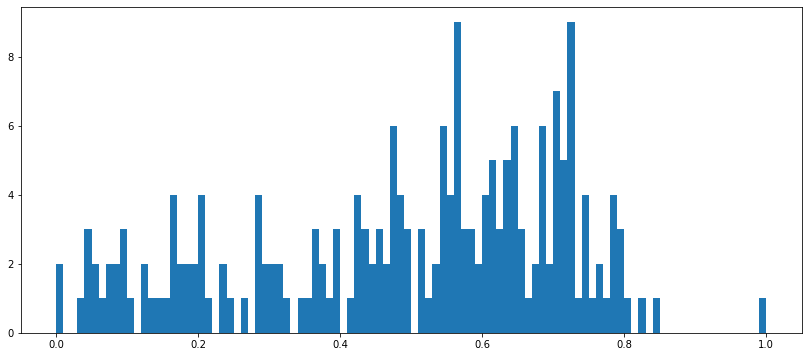

In [22]:
plt.figure(figsize=(14,6))
_ = plt.hist(nunique.astype(float)/train.shape[0], bins=100)

In [23]:
mask = (nunique.astype(float)/train.shape[0] > 0.8)
train.loc[:, mask]

,ID_code,var_45,var_74,var_117
0,train_0,-7.0170,43.1127,15.5752
1,train_1,-47.3797,7.7841,7.8522
2,train_2,-7.9078,19.7312,28.7632
3,train_3,-24.6840,4.5290,38.1015
4,train_4,-65.4863,-4.5346,25.6795
...,...,...,...,...
199995,train_199995,-2.1296,20.8357,34.6265
199996,train_199996,-27.2007,20.3267,3.7648
199997,train_199997,-49.5007,10.8834,43.0307
199998,train_199998,-42.9704,43.5092,46.4915


In [24]:
train['var_45'].value_counts()

-2.8410     7
-11.6023    6
-25.7142    5
 12.8946    5
-15.0639    5
           ..
 17.4682    1
 9.7608     1
-36.6158    1
-37.9619    1
-0.0625     1
Name: var_45, Length: 169968, dtype: int64

In [25]:
train['var_74'].value_counts()

 25.6287    7
 19.0988    6
 17.3676    6
 22.4514    6
 12.7275    6
           ..
 10.1628    1
-3.5163     1
 27.9294    1
-2.5784     1
 40.1471    1
Name: var_74, Length: 161058, dtype: int64

In [26]:
train['var_117'].value_counts()

 25.5994    8
 20.2827    5
 3.2310     5
 15.1265    5
 18.9751    5
           ..
-2.4050     1
 27.4008    1
 10.2243    1
 19.6765    1
-0.1250     1
Name: var_117, Length: 164469, dtype: int64

In [32]:
def plot_feature_scatter(df1, df2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(4,4,figsize=(14,14))

    for feature in features:
        i += 1
        plt.subplot(4,4,i)
        plt.scatter(df1[feature], df2[feature], marker='+')
        plt.xlabel(feature, fontsize=9)
    plt.show();

<Figure size 432x288 with 0 Axes>

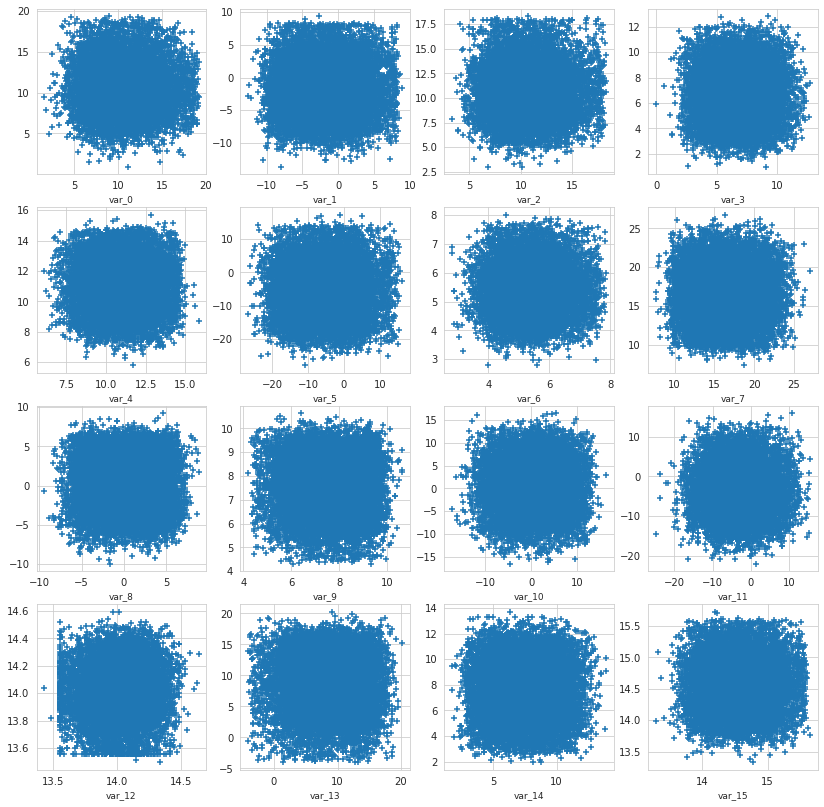

In [34]:
features = ['var_0', 'var_1','var_2','var_3', 'var_4', 'var_5', 'var_6', 'var_7', 
           'var_8', 'var_9', 'var_10','var_11','var_12', 'var_13', 'var_14', 'var_15', 
           ]
plot_feature_scatter(train[::20],test[::20], features)

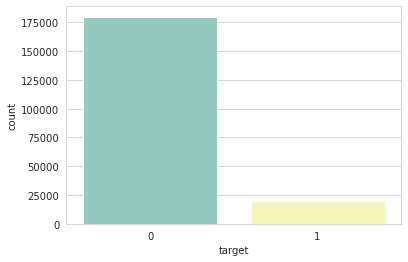

In [38]:
sns.countplot(x = train['target'], palette='Set3');

In [40]:
print("There are {}% target values with 1".format(100 * train["target"].value_counts()[1]/train.shape[0]))

There are 10.049% target values with 1


In [49]:
def plot_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(10,10,figsize=(18,22))

    for feature in features:
        i += 1
        plt.subplot(10,10,i)
        sns.kdeplot(df1[feature],label=label1)
        sns.kdeplot(df2[feature],label=label2)
        plt.xlabel(feature, fontsize=9)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=6, pad=-6)
        plt.tick_params(axis='y', which='major', labelsize=6)
    plt.show();

<Figure size 432x288 with 0 Axes>

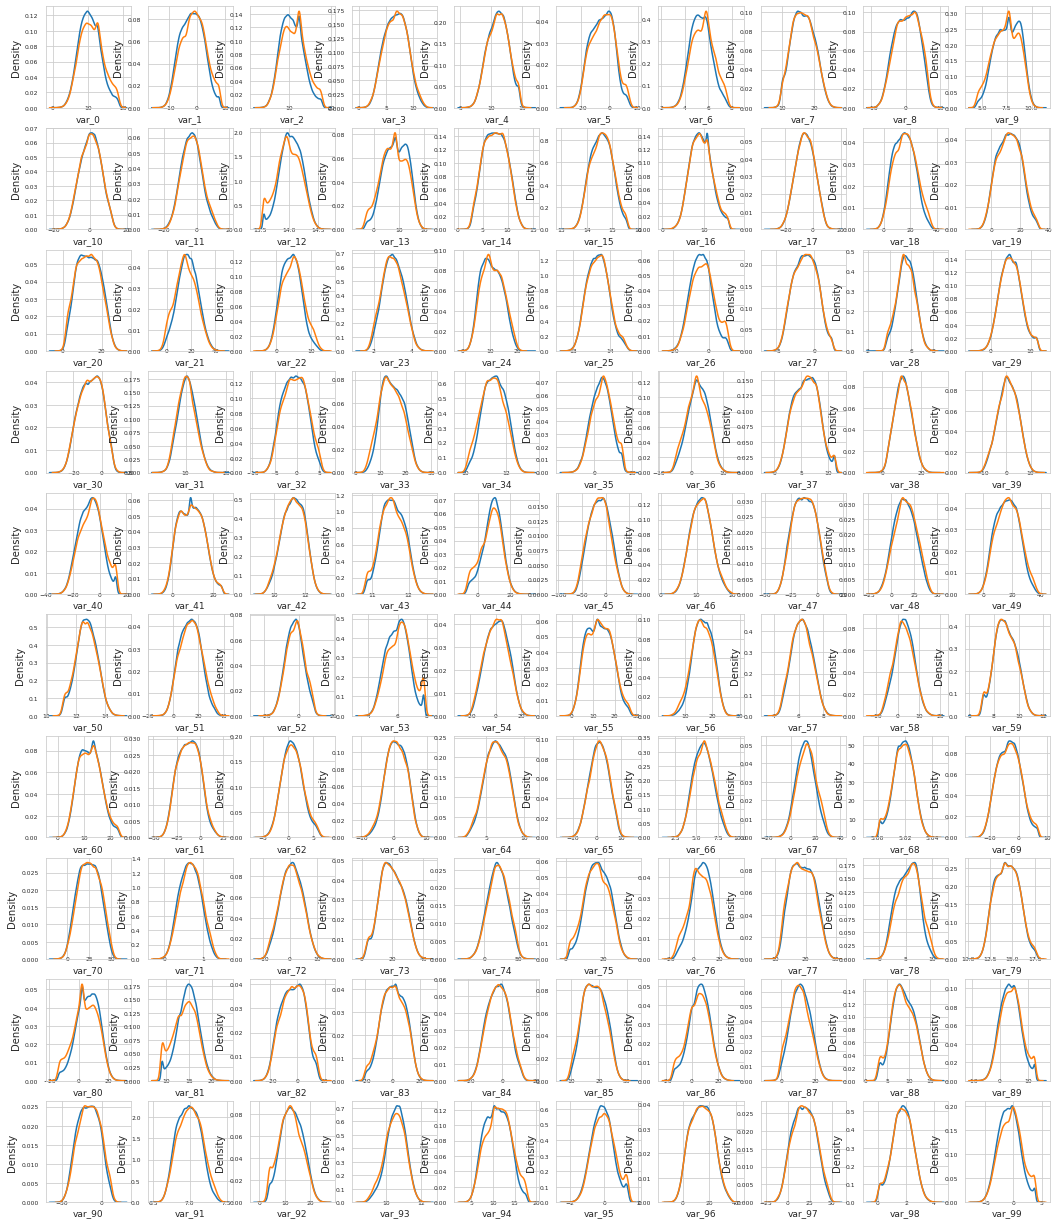

In [50]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[2:102]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

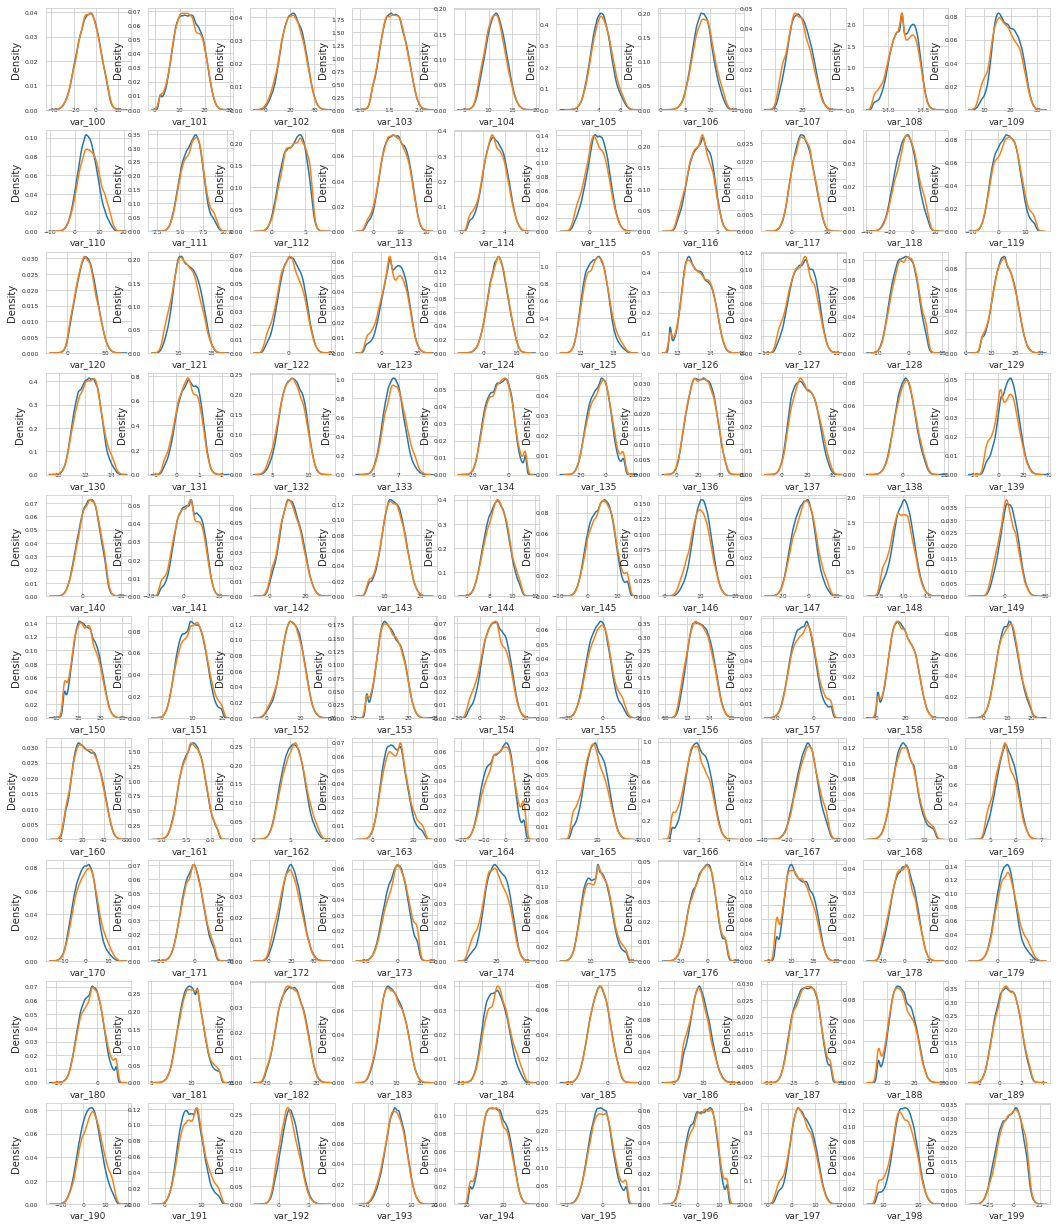

In [52]:
features = train.columns.values[102:202]
plot_feature_distribution(t0, t1, '0', '1', features)

<Figure size 432x288 with 0 Axes>

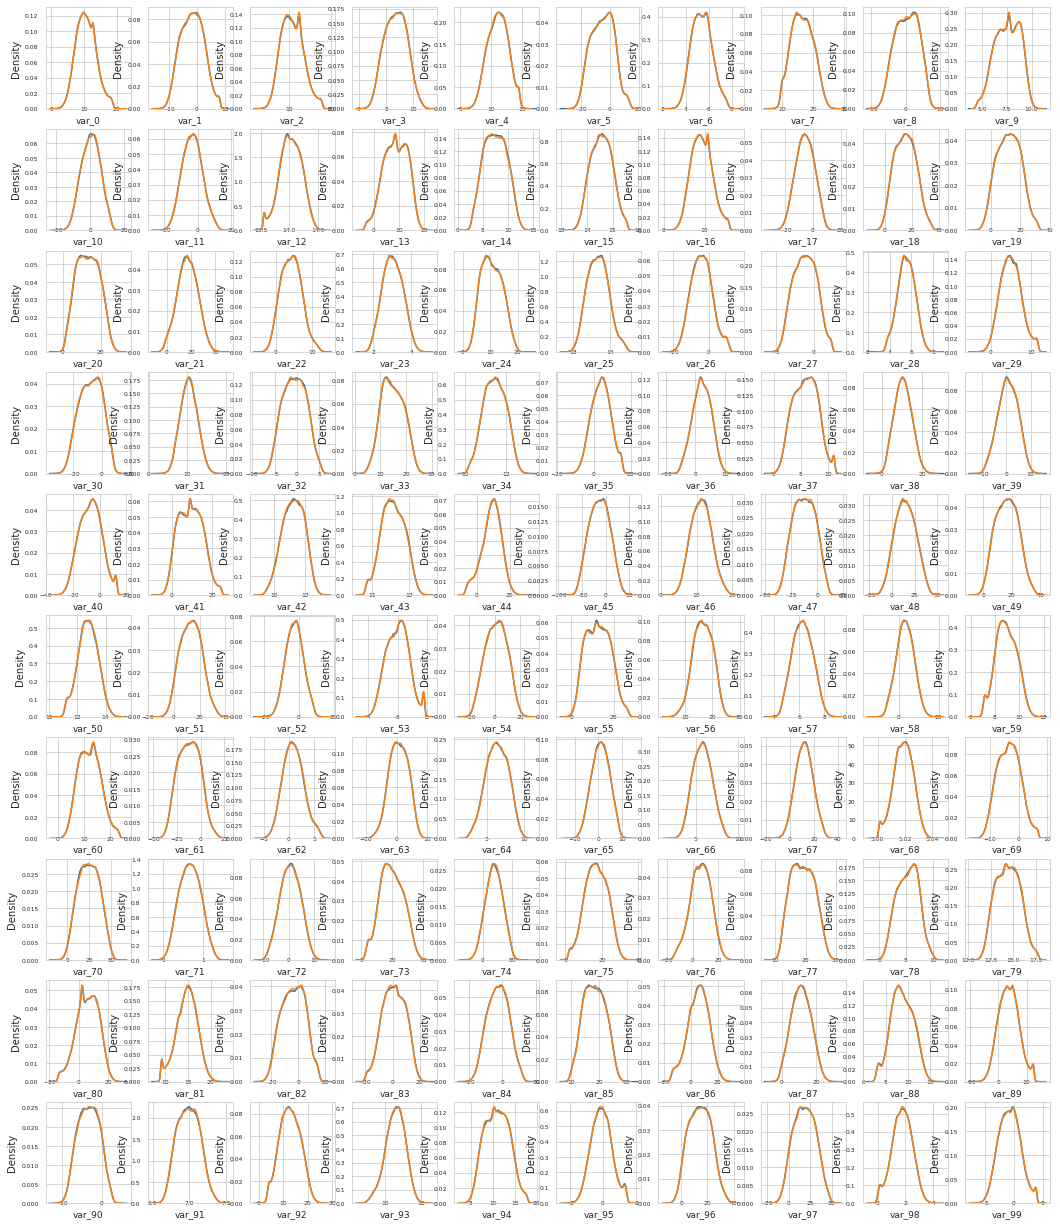

In [55]:
features = train.columns.values[2:102]
plot_feature_distribution(train, test, 'train', 'test', features)

<Figure size 432x288 with 0 Axes>

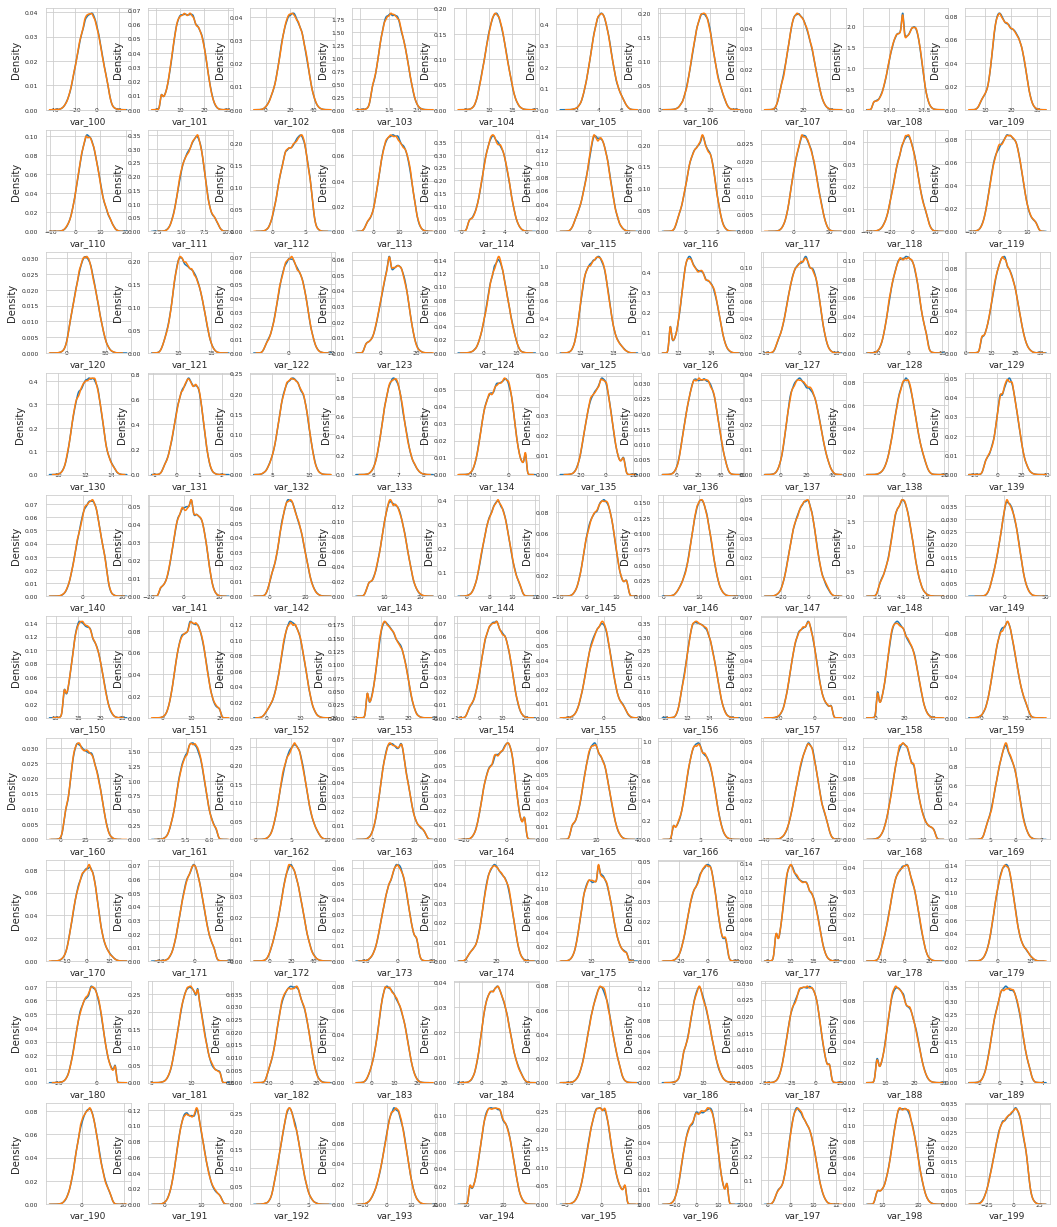

In [56]:
features = train.columns.values[102:202]
plot_feature_distribution(train, test, 'train', 'test', features)

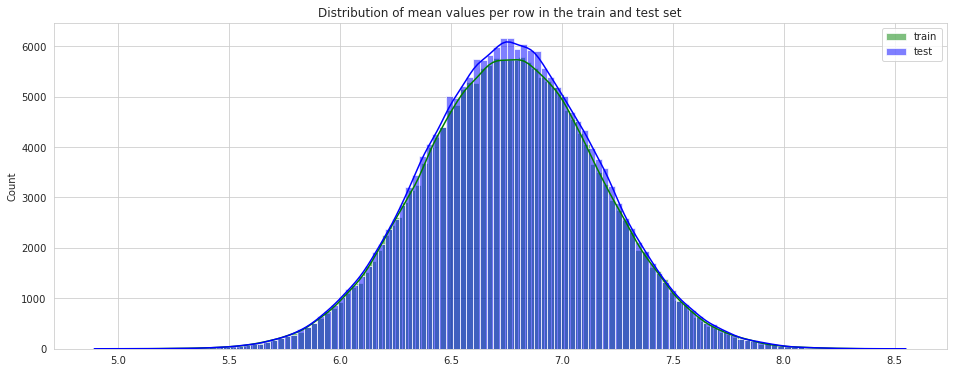

In [59]:
plt.figure(figsize=(16,6))
features = train.columns.values[2:202]
plt.title("Distribution of mean values per row in the train and test set")
sns.histplot(train[features].mean(axis=1),color="green", kde=True,bins=120, label='train')
sns.histplot(test[features].mean(axis=1),color="blue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

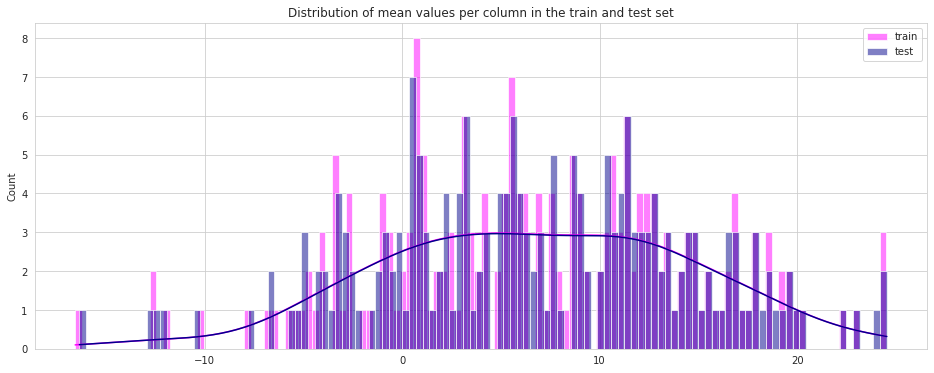

In [63]:
plt.figure(figsize=(16,6))
plt.title("Distribution of mean values per column in the train and test set")
sns.histplot(train[features].mean(axis=0),color="magenta",kde=True,bins=120, label='train')
sns.histplot(test[features].mean(axis=0),color="darkblue", kde=True,bins=120, label='test')
plt.legend()
plt.show()

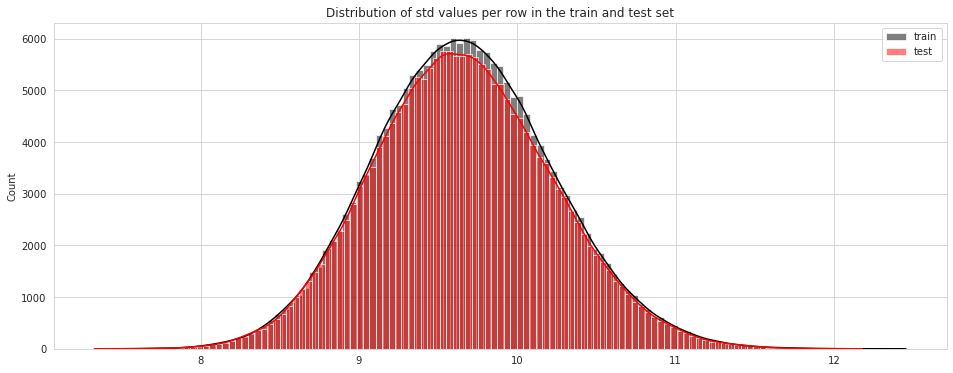

In [65]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per row in the train and test set")
sns.histplot(train[features].std(axis=1),color="black", kde=True,bins=120, label='train')
sns.histplot(test[features].std(axis=1),color="red", kde=True,bins=120, label='test')
plt.legend();plt.show()

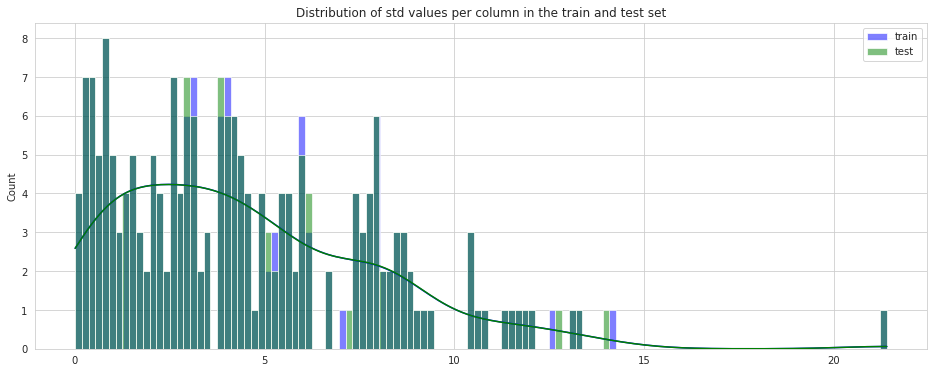

In [67]:
plt.figure(figsize=(16,6))
plt.title("Distribution of std values per column in the train and test set")
sns.histplot(train[features].std(axis=0),color="blue",kde=True,bins=120, label='train')
sns.histplot(test[features].std(axis=0),color="green", kde=True,bins=120, label='test')
plt.legend(); plt.show()

In [68]:
%%time
correlations = train[features].corr().abs().unstack().sort_values(kind="quicksort").reset_index()
correlations = correlations[correlations['level_0'] != correlations['level_1']]
correlations.head(10)

CPU times: user 12.1 s, sys: 90.6 ms, total: 12.2 s
Wall time: 12.4 s


,level_0,level_1,0
0,var_75,var_191,2.703975e-08
1,var_191,var_75,2.703975e-08
2,var_173,var_6,5.942735e-08
3,var_6,var_173,5.942735e-08
4,var_126,var_109,1.313947e-07
5,var_109,var_126,1.313947e-07
6,var_144,var_27,1.772502e-07
7,var_27,var_144,1.772502e-07
8,var_177,var_100,3.116544e-07
9,var_100,var_177,3.116544e-07


In [69]:
correlations.tail(10)

,level_0,level_1,0
39790,var_183,var_189,0.009359
39791,var_189,var_183,0.009359
39792,var_174,var_81,0.009490
39793,var_81,var_174,0.009490
39794,var_81,var_165,0.009714
39795,var_165,var_81,0.009714
39796,var_53,var_148,0.009788
39797,var_148,var_53,0.009788
39798,var_26,var_139,0.009844
39799,var_139,var_26,0.009844


In [70]:
features = train.columns.values[2:202]
unique_max_train = []
unique_max_test = []
for feature in features:
    values = train[feature].value_counts()
    unique_max_train.append([feature, values.max(), values.idxmax()])
    values = test[feature].value_counts()
    unique_max_test.append([feature, values.max(), values.idxmax()])

In [71]:
np.transpose((pd.DataFrame(unique_max_train, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,108,126,12,91,103,148,71,161,25,125,169,166,133,43
Feature,var_68,var_108,var_126,var_12,var_91,var_103,var_148,var_71,var_161,var_25,var_125,var_169,var_166,var_133,var_43
Max duplicates,1084,313,305,203,66,61,59,54,52,41,40,39,39,39,39
Value,5.0214,14.1999,11.5356,13.5545,6.9785,1.6662,4.0456,0.7031,5.7688,13.6723,12.5159,5.6941,2.7306,6.8632,11.4522


In [72]:
np.transpose((pd.DataFrame(unique_max_test, columns=['Feature', 'Max duplicates', 'Value'])).\
            sort_values(by = 'Max duplicates', ascending=False).head(15))

,68,126,108,12,91,103,148,161,25,71,43,166,125,169,133
Feature,var_68,var_126,var_108,var_12,var_91,var_103,var_148,var_161,var_25,var_71,var_43,var_166,var_125,var_169,var_133
Max duplicates,1104,307,302,188,86,78,74,69,60,60,58,53,53,51,50
Value,5.0197,11.5357,14.1999,13.5546,6.9939,1.4659,4.0004,5.7114,13.5965,0.5389,11.5738,2.8446,12.2189,5.8455,6.6873


Feature engineering

In [73]:
%%time
idx = features = train.columns.values[2:202]
for df in [test, train]:
    df['sum'] = df[idx].sum(axis=1)  
    df['min'] = df[idx].min(axis=1)
    df['max'] = df[idx].max(axis=1)
    df['mean'] = df[idx].mean(axis=1)
    df['std'] = df[idx].std(axis=1)
    df['skew'] = df[idx].skew(axis=1)
    df['kurt'] = df[idx].kurtosis(axis=1)
    df['med'] = df[idx].median(axis=1)

CPU times: user 9.7 s, sys: 2.8 s, total: 12.5 s
Wall time: 12.5 s


In [75]:
train[train.columns[202:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,1415.3636,-47.3797,40.5632,7.076818,10.336130,-0.351734,4.110215,7.22315
2,1240.8966,-22.4038,33.8820,6.204483,8.753387,-0.056957,0.546438,5.89940
3,1288.2319,-35.1659,38.1015,6.441160,9.594064,-0.480116,2.630499,6.70260
4,1354.2310,-65.4863,41.1037,6.771155,11.287122,-1.463426,9.787399,6.94735


In [76]:
test[test.columns[201:]].head()

,sum,min,max,mean,std,skew,kurt,med
0,1416.6404,-31.9891,42.0248,7.083202,9.910632,-0.088518,1.871262,7.31440
1,1249.6860,-41.1924,35.6020,6.248430,9.541267,-0.559785,3.391068,6.43960
2,1430.2599,-34.3488,39.3654,7.151300,9.967466,-0.135084,2.326901,7.26355
3,1411.4447,-21.4797,40.3383,7.057224,8.257204,-0.167741,2.253054,6.89675
4,1423.7364,-24.8254,45.5510,7.118682,10.043542,0.293484,2.044943,6.83375


In [80]:
def plot_new_feature_distribution(df1, df2, label1, label2, features):
    i = 0
    sns.set_style('whitegrid')
    plt.figure()
    fig, ax = plt.subplots(2,4,figsize=(18,8))

    for feature in features:
        i += 1
        plt.subplot(2,4,i)
        sns.kdeplot(df1[feature], bw_method=0.5,label=label1)
        sns.kdeplot(df2[feature], bw_method=0.5,label=label2)
        plt.xlabel(feature, fontsize=11)
        locs, labels = plt.xticks()
        plt.tick_params(axis='x', which='major', labelsize=8)
        plt.tick_params(axis='y', which='major', labelsize=8)
    plt.show();

<Figure size 432x288 with 0 Axes>

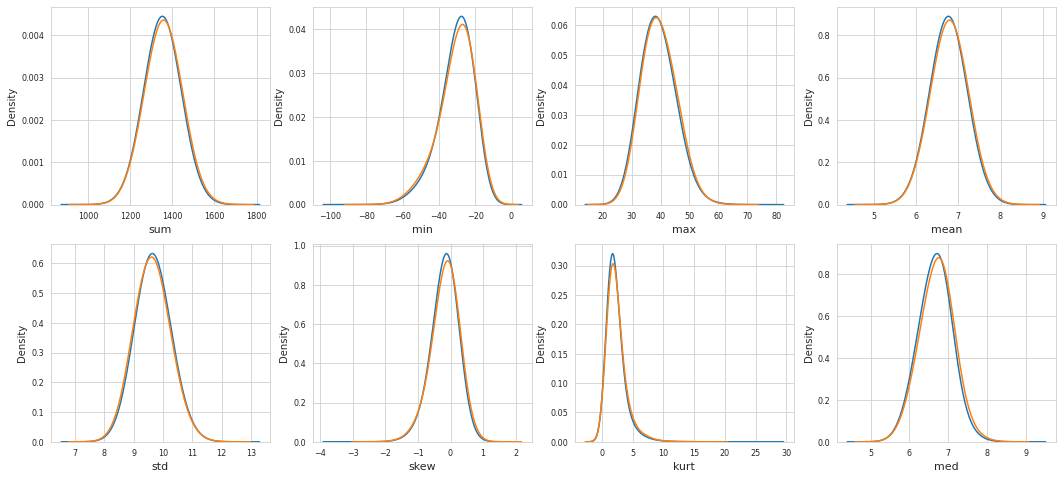

In [81]:
t0 = train.loc[train['target'] == 0]
t1 = train.loc[train['target'] == 1]
features = train.columns.values[202:]
plot_new_feature_distribution(t0, t1, 'target: 0', 'target: 1', features)

<Figure size 432x288 with 0 Axes>

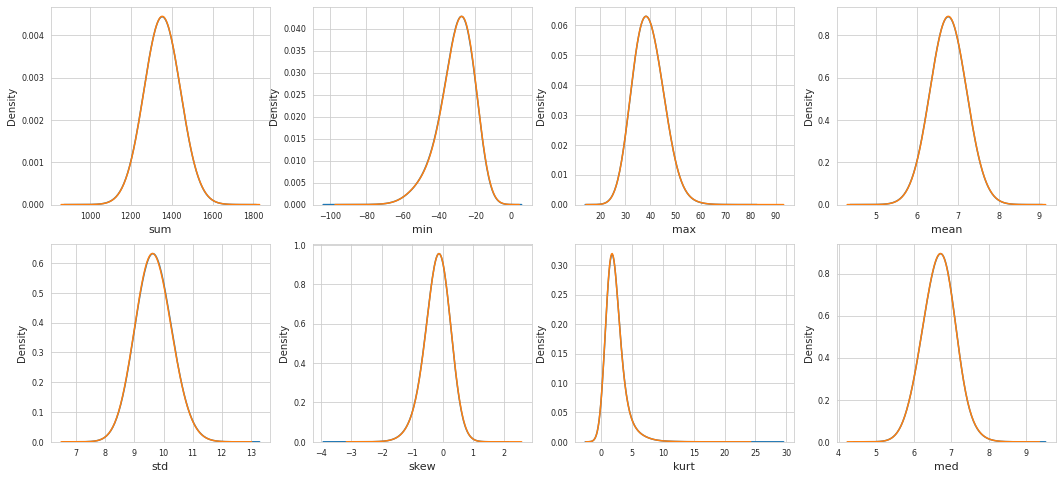

In [82]:
features = train.columns.values[202:]
plot_new_feature_distribution(train, test, 'train', 'test', features)

In [83]:
train.head()

,ID_code,target,var_0,var_1,var_2,var_3,var_4,var_5,var_6,var_7,var_8,var_9,var_10,var_11,var_12,var_13,var_14,var_15,var_16,var_17,var_18,var_19,var_20,var_21,var_22,var_23,var_24,var_25,var_26,var_27,var_28,var_29,var_30,var_31,var_32,var_33,var_34,var_35,var_36,var_37,var_38,var_39,var_40,var_41,var_42,var_43,var_44,var_45,var_46,var_47,var_48,var_49,var_50,var_51,var_52,var_53,var_54,var_55,var_56,var_57,var_58,var_59,var_60,var_61,var_62,var_63,var_64,var_65,var_66,var_67,var_68,var_69,var_70,var_71,var_72,var_73,var_74,var_75,var_76,var_77,var_78,var_79,var_80,var_81,var_82,var_83,var_84,var_85,var_86,var_87,var_88,var_89,var_90,var_91,var_92,var_93,var_94,var_95,var_96,var_97,var_98,var_99,var_100,var_101,var_102,var_103,var_104,var_105,var_106,var_107,var_108,var_109,var_110,var_111,var_112,var_113,var_114,var_115,var_116,var_117,var_118,var_119,var_120,var_121,var_122,var_123,var_124,var_125,var_126,var_127,var_128,var_129,var_130,var_131,var_132,var_133,var_134,var_135,var_136,var_137,var_138,var_139,var_140,var_141,var_142,var_143,var_144,var_145,var_146,var_147,var_148,var_149,var_150,var_151,var_152,var_153,var_154,var_155,var_156,var_157,var_158,var_159,var_160,var_161,var_162,var_163,var_164,var_165,var_166,var_167,var_168,var_169,var_170,var_171,var_172,var_173,var_174,var_175,var_176,var_177,var_178,var_179,var_180,var_181,var_182,var_183,var_184,var_185,var_186,var_187,var_188,var_189,var_190,var_191,var_192,var_193,var_194,var_195,var_196,var_197,var_198,var_199,sum,min,max,mean,std,skew,kurt,med
0,train_0,0,8.9255,-6.7863,11.9081,5.0930,11.4607,-9.2834,5.1187,18.6266,-4.9200,5.7470,2.9252,3.1821,14.0137,0.5745,8.7989,14.5691,5.7487,-7.2393,4.2840,30.7133,10.5350,16.2191,2.5791,2.4716,14.3831,13.4325,-5.1488,-0.4073,4.9306,5.9965,-0.3085,12.9041,-3.8766,16.8911,11.1920,10.5785,0.6764,7.8871,4.6667,3.8743,-5.2387,7.3746,11.5767,12.0446,11.6418,-7.0170,5.9226,-14.2136,16.0283,5.3253,12.9194,29.0460,-0.6940,5.1736,-0.7474,14.8322,11.2668,5.3822,2.0183,10.1166,16.1828,4.9590,2.0771,-0.2154,8.6748,9.5319,5.8056,22.4321,5.0109,-4.7010,21.6374,0.5663,5.1999,8.8600,43.1127,18.3816,-2.3440,23.4104,6.5199,12.1983,13.6468,13.8372,1.3675,2.9423,-4.5213,21.4669,9.3225,16.4597,7.9984,-1.7069,-21.4494,6.7806,11.0924,9.9913,14.8421,0.1812,8.9642,16.2572,2.1743,-3.4132,9.4763,13.3102,26.5376,1.4403,14.7100,6.0454,9.5426,17.1554,14.1104,24.3627,2.0323,6.7602,3.9141,-0.4851,2.5240,1.5093,2.5516,15.5752,-13.4221,7.2739,16.0094,9.7268,0.8897,0.7754,4.2218,12.0039,13.8571,-0.7338,-1.9245,15.4462,12.8287,0.3587,9.6508,6.5674,5.1726,3.1345,29.4547,31.4045,2.8279,15.6599,8.3307,-5.6011,19.0614,11.2663,8.6989,8.3694,11.5659,-16.4727,4.0288,17.9244,18.5177,10.7800,9.0056,16.6964,10.4838,1.6573,12.1749,-13.1324,17.6054,11.5423,15.4576,5.3133,3.6159,5.0384,6.6760,12.6644,2.7004,-0.6975,9.5981,5.4879,-4.7645,-8.4254,20.8773,3.1531,18.5618,7.7423,-10.1245,13.7241,-3.5189,1.7202,-8.4051,9.0164,3.0657,14.3691,25.8398,5.8764,11.8411,-19.7159,17.5743,0.5857,4.4354,3.9642,3.1364,1.6910,18.5227,-2.3978,7.8784,8.5635,12.7803,-1.0914,1456.3182,-21.4494,43.1127,7.281591,9.331540,0.101580,1.331023,6.77040
1,train_1,0,11.5006,-4.1473,13.8588,5.3890,12.3622,7.0433,5.6208,16.5338,3.1468,8.0851,-0.4032,8.0585,14.0239,8.4135,5.4345,13.7003,13.8275,-15.5849,7.8000,28.5708,3.4287,2.7407,8.5524,3.3716,6.9779,13.8910,-11.7684,-2.5586,5.0464,0.5481,-9.2987,7.8755,1.2859,19.3710,11.3702,0.7399,2.7995,5.8434,10.8160,3.6783,-11.1147,1.8730,9.8775,11.7842,1.2444,-47.3797,7.3718,0.1948,34.4014,25.7037,11.8343,13.2256,-4.1083,6.6885,-8.0946,18.5995,19.3219,7.0118,1.9210,8.8682,8.0109,-7.2417,1.7944,-1.3147,8.1042,1.5365,5.4007,7.9344,5.0220,2.2302,40.5632,0.5134,3.1701,20.1068,7.7841,7.0529,3.2709,23.4822,5.5075,13.7814,2.5462,18.1782,0.3683,-4.8210,-5.4850,13.7867,-13.5901,11.0993,7.9022,12.2301,0.4768,6.8852,8.0905,10.9631,11.7569,-1.2722,24.7876,26.6881,1.8944,0.6939,-13.6950,8.4068,35.4734,1.7093,15.1866,2.6227,7.3412,32.0888,13.9550,13.0858,6.6203,7.1051,5.35

In [84]:
target = train['target']

In [85]:
train.select_dtypes(include=['object']).columns

Index(['ID_code'], dtype='object')

In [86]:
train.drop(columns = ['target', 'ID_code'], inplace=True)

In [87]:
test.drop(columns = ['ID_code'], inplace=True)

In [38]:
pca = PCA(n_components=28)

train_pca = pca.fit_transform(train)

In [41]:
test_pca = pca.transform(test)

In [43]:
train_pca = pd.DataFrame(train_pca)
test_pca = pd.DataFrame(test_pca)

In [45]:
train_pca

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27
0,-5.604732,-23.546583,-1.984585,5.233849,2.540240,-9.063456,2.145306,14.676347,11.204780,1.751129,-8.147742,-0.140442,1.109293,14.065970,-4.371490,-15.529518,-11.229482,0.016964,-13.265294,3.449615,0.686034,1.220860,1.361429,1.119072,6.213181,-1.170074,-2.839916,3.982275
1,34.876447,11.415848,-3.652774,-19.350722,-8.699706,7.122243,-15.674967,2.985027,8.342912,18.752546,4.868924,-11.080265,-9.411380,-15.783325,-1.740471,-9.390671,6.693436,-13.315057,-0.920006,7.228493,-0.581996,-14.565812,10.409210,0.806799,4.472623,12.034648,8.850124,5.820382
2,-4.789153,-0.388689,11.371931,8.625470,1.208086,-3.629353,21.553111,1.336685,-3.917010,6.291635,-11.553426,-5.119397,-6.273039,-2.370050,4.664626,-11.543329,-5.005600,-17.542228,4.672439,9.393393,-11.491130,8.896808,5.245778,13.456783,-10.489182,-12.874436,-4.209322,9.705446
3,11.872036,13.984175,24.017445,-4.371023,0.366775,5.624410,20.142172,-12.242256,-1.638316,-14.261971,7.513966,22.975700,5.450612,1.416625,5.620705,13.743942,9.903873,-0.834430,-8.048655,-7.639581,-1.040702,8.651804,3.438604,-5.144545,-12.596177,-1.084143,6.827926,-4.769248
4,52.712164,24.260389,4.389353,24.000137,-17.813267,16.283226,-15.418137,-11.837188,-18.383118,-14.775467,9.799565,-14.019544,5.927341,-2.984661,-4.277859,2.722594,17.153406,5.442179,-7.673484,-13.599365,1.327603,0.013178,-1.393099,-2.486599,7.891548,9.559277,-1.827489,-2.553252
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,-10.727173,-1.964927,18.562416,0.242926,12.802894,-3.101489,-4.407309,-8.363585,-7.437109,-22.823594,11.553440,2.404261,12.360155,-3.472534,6.995839,-6.266929,14.787126,10.102442,-4.200156,-2.638445,2.712533,-6.844777,-13.632668,-7.314652,-13.434562,7.563868,0.705447,-17.920561
199996,14.448043,-0.226280,-17.004963,19.545466,-14.581352,-2.073112,1.698618,-0.894030,8.731999,11.266174,10.889498,5.806089,-0.269826,20.594379,2.788527,-0.050978,9.372872,13.142392,1.263515,0.074475,3.231798,7.950823,5.767858,-10.191627,5.462214,7.824934,-6.053147,6.178866
199997,36.844295,7.814670,30.186909,-9.860868,7.425518,4.078484,-1.596090,5.021921,-3.409655,2.463812,-3.948087,8.801574,-6.638399,0.975355,-3.955730,-4.125675,2.678620,-0.698535,-5.220379,-1.912047,-0.724480,3.962296,12.577346,2.630974,-8.908905,4.204647,7.884884,7.539534
199998,30.231560,-24.459610,25.732372,22.632622,-8.823246,-6.079584,1.249868,-3.329189,8.656097,11.274244,14.136675,-14.410931,2.233499,-25.120515,12.379667,0.641994,-5.459688,7.107880,17.789933,-3.244602,2.624621,-1.980967,3.318548,-5.461675,8.402796,1.372192,3.092189,0.687810


In [51]:
X_train = train_pca[:100000]
X_valid = train_pca[100000:]
y_train = target[:100000]
y_valid = target[100000:]

In [88]:
X_train = train[:100000]
X_valid = train[100000:]
y_train = target[:100000]
y_valid = target[100000:]

In [89]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import RandomizedSearchCV

gbm = LGBMClassifier(class_weight = 'balanced')

parameters_lgbm = {'learning_rate':(0.1,0.01), 'n_estimators':range(40,600,10),
                'max_depth':range(2,12,2),
              }

clf_lgbm = RandomizedSearchCV(gbm, parameters_lgbm, random_state=0, cv=5)

clf_lgbm.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=LGBMClassifier(class_weight='balanced'),
                   param_distributions={'learning_rate': (0.1, 0.01),
                                        'max_depth': range(2, 12, 2),
                                        'n_estimators': range(40, 600, 10)},
                   random_state=0)

In [100]:
y_pred_lgbm = clf_lgbm.predict_proba(X_valid)[:,1]

In [101]:
average_precision_score(y_valid, y_pred_lgbm), roc_auc_score(y_valid, y_pred_lgbm)

(0.5390276988000747, 0.8731991258589715)

<AxesSubplot:>

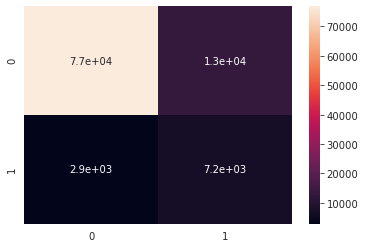

In [102]:
sns.heatmap(confusion_matrix(y_valid, y_pred_lgbm.round()), annot=True)

In [103]:
print(classification_report(y_valid, y_pred_lgbm.round()))

              precision    recall  f1-score   support

           0       0.96      0.85      0.91     89917
           1       0.35      0.71      0.47     10083

    accuracy                           0.84    100000
   macro avg       0.66      0.78      0.69    100000
weighted avg       0.90      0.84      0.86    100000



(0.28277009945865295, 0.7848585313800657) - Sem PCA
(0.1260778556535362, 0.5910938575902066) - PCA 28 Comp
(0.5390276988000747, 0.8731991258589715) - Sem PCA com Feature Engenering

In [104]:
prediction = clf_lgbm.predict_proba(test)[:, 1]

In [105]:
sub = pd.read_csv('../Datasets/santander-customer-transaction-prediction/sample_submission.csv')

In [106]:
sub

,ID_code,target
0,test_0,0
1,test_1,0
2,test_2,0
3,test_3,0
4,test_4,0
...,...,...
199995,test_199995,0
199996,test_199996,0
199997,test_199997,0
199998,test_199998,0


In [109]:
submission = pd.DataFrame()
submission['ID_code'] = sub['ID_code']
submission['target'] = prediction

In [110]:
submission.to_csv('../Datasets/submission0.csv', index=False)